In [3]:
import cv2
import numpy as np
from scipy import ndimage, misc
from matplotlib import pyplot as plt

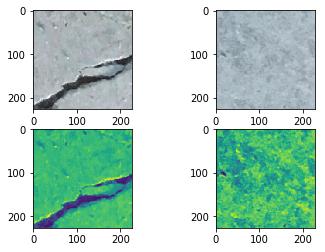

In [4]:
pos = cv2.imread("C:\\Users\\Rasmus\\Desktop\\Deep Learning\\concrete_data\\Positive\\{0:05d}.jpg".format(np.random.randint(1,10000)))
neg = cv2.imread("C:\\Users\\Rasmus\\Desktop\\Deep Learning\\concrete_data\\Negative\\{0:05d}.jpg".format(np.random.randint(1,20000)))

g_pos = cv2.cvtColor(pos, cv2.COLOR_BGR2GRAY)
g_neg = cv2.cvtColor(neg, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(pos)
plt.subplot(2, 2, 2)
plt.imshow(neg)
plt.subplot(2, 2, 3)
plt.imshow(g_pos)
plt.subplot(2, 2, 4)
plt.imshow(g_neg)

In [5]:
def find_limits(img, lb, ub):
    w, h = img.shape
    im_arr = np.reshape(img, (w*h))
    
    im_arr = np.sort(im_arr)
    
    i_a = int(round(w*h * lb, 0))
    i_b = int(round(w*h * ub, 0))
    
    a = im_arr[i_a-1]
    b = im_arr[i_b-1]
    
    t = find_t(im_arr, i_a, i_b)
    
    return a, b, t

def find_t(arr, ia, ib):
    a, b = arr[ia], arr[ib]
    
    interval = arr[ia:ib+1]
    mean_i = sum(interval) / len(interval)
    
    t = (2*mean_i*(b - a)) / (255*(a+b))
    print(t)
    
    return t

def nl_grayscale(img, lb, ub):
    new_a = 0
    new_b = 255
    a, b, t = find_limits(img, lb, ub)
    w, h = img.shape
    

    im_out = img.copy()
    
    i = img<a
    im_out[i] = new_a
    
    i = img > b
    im_out[i] = new_b
    
    
    for i in range(w):
        for j in range(h):
            if img[i, j] < a and not img[i, j] > b:
                new_a + ((new_a - new_b) / (a**t - b**t)) * (img[i, j]**t - a**t)
                
                
    #im_out[not img<b] = new_b
    #im_out[img<a and not img<b] = new_a
    
    return im_out

pos = cv2.imread("C:\\Users\\Rasmus\\Desktop\\Deep Learning\\concrete_data\\Positive\\{0:05d}.jpg".format(np.random.randint(1,10000)))
neg = cv2.imread("C:\\Users\\Rasmus\\Desktop\\Deep Learning\\concrete_data\\Negative\\{0:05d}.jpg".format(np.random.randint(1,20000)))

g_pos = cv2.cvtColor(pos, cv2.COLOR_BGR2GRAY)
g_neg = cv2.cvtColor(neg, cv2.COLOR_BGR2GRAY)

nl_pos = nl_grayscale(g_pos, 0.02, 0.5)
nl_pos1 = nl_grayscale(g_pos, 0.03, 0.10)
nl_pos2 = nl_grayscale(g_pos, 0.1, 0.30)
nl_pos3 = nl_grayscale(g_pos, 0.05, 0.15)
    
# plt.figure()
# plt.subplot(1, 3, 1)
# plt.imshow(pos)
# plt.subplot(1, 3, 2)
# plt.imshow(g_pos)
# plt.subplot(1, 3, 3)
# plt.imshow(nl_pos)

print(np.unique(nl_pos))

cv2.imshow("Original", pos)
cv2.imshow("Linear", g_pos)
cv2.imshow("Non-Linear", nl_pos)
cv2.imshow("Non-Linear 1", nl_pos1)
cv2.imshow("Non-Linear 2", nl_pos2)
cv2.imshow("Non-Linear 3", nl_pos3)
cv2.waitKey(0)
cv2.destroyAllWindows()

0.6403427441236791
0.08960240345592643
0.42626814725927925
0.1629287952041483
[  0  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 255]


In [4]:
blur = cv2.GaussianBlur(nl_pos, (7, 7), 1)
retval, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

thresh = np.invert(thresh)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13))
#kernel = np.ones((11, 11), np.uint8)
ero = cv2.erode(thresh, kernel, iterations=1)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
open_img = cv2.dilate(ero, kernel, iterations=1)
#open_img = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

cv2.imshow("Original", pos)
cv2.imshow("Non-Linear", nl_pos)
cv2.imshow("Thresh", thresh)
cv2.imshow("Open", open_img)
cv2.waitKey()

32

In [ ]:
hej = [0, 1, 2, 3, 4, 5]
print(hej)

In [86]:
img = cv2.imread("C:\\Users\\Rasmus\\Desktop\\Deep Learning\\concrete_data\\Negative\\{0:05d}.jpg".format(np.random.randint(1,10000)))
g_pos = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

g_res2 = cv2.cvtColor(res2, cv2.COLOR_BGR2GRAY)
#nl_pos = nl_grayscale(g_pos, 0.05, 0.2)
#nl_pos1 = nl_grayscale(g_pos, 0.03, 0.10)
#nl_pos2 = nl_grayscale(g_pos, 0.1, 0.30)
#nl_pos3 = nl_grayscale(g_pos, 0.05, 0.15)

print(np.unique(res2))

cv2.imshow("Original",img)
cv2.imshow("K_means", res2)


cv2.imshow("Grayscale", g_res2)

#cv2.imshow("Non-Linear", nl_pos)
#cv2.imshow("Non-Linear 1", nl_pos1)
#cv2.imshow("Non-Linear 2", nl_pos2)
#cv2.imshow("Non-Linear 3", nl_pos3)
cv2.waitKey(0)
cv2.destroyAllWindows()

[182 189 191 196 198 202]


In [69]:
pos = cv2.imread("C:\\Users\\Rasmus\\Desktop\\Deep Learning\\concrete_data\\Positive\\{0:05d}.jpg".format(np.random.randint(1,10000)))
neg = cv2.imread("C:\\Users\\Rasmus\\Desktop\\Deep Learning\\concrete_data\\Negative\\{0:05d}.jpg".format(np.random.randint(1,20000)))

g_pos = cv2.cvtColor(pos, cv2.COLOR_BGR2GRAY)
#g_neg = cv2.cvtColor(neg, cv2.COLOR_BGR2GRAY)
g_blur = cv2.medianBlur(g_pos, 3)

retval, th = cv2.threshold(g_blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

nl_pos = nl_grayscale(g_pos, 0.05, 0.2)
nl_pos1 = nl_grayscale(g_pos, 0.03, 0.1)
nl_pos2 = nl_grayscale(g_pos, 0.1, 0.30)
nl_pos3 = nl_grayscale(g_pos, 0.05, 0.15)

retval1, th1 = cv2.threshold(nl_pos, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
retval2, th2 = cv2.threshold(nl_pos1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
retval3, th3 = cv2.threshold(nl_pos3, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


cv2.imshow("Original", pos)
cv2.imshow("Otsu's Threshold Grayscale", th)
cv2.imshow("Otsu's Threshold NL1-Grayscale", th1)
cv2.imshow("Otsu's Threshold NL2-Grayscale", th2)
cv2.imshow("Otsu's Threshold NL3-Grayscale", th3)

cv2.waitKey(0)
cv2.destroyAllWindows()

0.38223314719844104
0.2846104354969641
0.6892906295254214
0.3444800881809386


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in ubyte_scalars


In [1]:
#label = "C:\\Users\\Rasmus\\Desktop\\Deep Learning\\concrete_data\\Positive\\{0:05d}.jpg".format(1605)
label = "C:\\Users\\Rasmus\\Desktop\\Deep Learning\\concrete_data\\Negative\\{0:05d}.jpg".format(np.random.randint(1,20000))

#label = "C:\\Users\\Rasmus\\Desktop\\Deep Learning\\concrete_data\\Positive\\{0:05d}.jpg".format(np.random.randint(1,10000))
print(label)
pos = cv2.imread(label)

blur = cv2.medianBlur(pos, 3)
g_blur = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
g_pos = g_blur

# g_pos = cv2.cvtColor(pos, cv2.COLOR_BGR2GRAY)
# g_blur = cv2.medianBlur(g_pos, 3)




#g_pos = cv2.equalizeHist(g_pos)



norm_retval, th = cv2.threshold(g_blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
th_open = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)


p = round(np.count_nonzero(th_open)/(227*227), 4)

norm_retval, th = cv2.threshold(g_blur, norm_retval-20, 255, cv2.THRESH_BINARY_INV)

# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
# th_open = cv2.dilate(th, kernel, iterations=1)
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
# th_open = cv2.erode(th, kernel, iterations=1)
# #th_open = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)
# th_open = cv2.medianBlur(th_open, 5)


nl = nl_grayscale(g_blur, 0.02, p)
nl_retval, nl_th1 = cv2.threshold(nl, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
nl_boom, nl_th = cv2.threshold(nl, nl_retval-15, 255, cv2.THRESH_BINARY_INV)

# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
# th_open = cv2.dilate(nl_th, kernel, iterations=1)
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
th_open = cv2.erode(nl_th, kernel, iterations=1)
#th_open = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)
# th_open = cv2.medianBlur(nl_th, 5)



nl_iotsu, nl_otsu_blur = improved_otsu(nl, nl_retval)
nl_otsu, nl_otsu_blur = improved_otsu(nl, nl_retval-20)

# nl_kmean = k_means(nl, 4, color=False)

# k_m = k_means(blur)
# k_m_s = k_means_segment(blur, 2)

cv2.imshow("OP", pos)
#cv2.imshow("Otsu's Threshold Grayscale", th)
cv2.imshow("open", th)

cv2.imshow("Gray", g_pos)
cv2.imshow("nl_g", nl)
cv2.imshow("nl_g_otsu", nl_th)
cv2.imshow("im_o_low", nl_otsu)
cv2.imshow("im_o_low_blur", nl_otsu_blur)

cv2.imshow("im_o", nl_iotsu)



cv2.waitKey(0)
cv2.destroyAllWindows()
#cv2.imshow("Non-Linear Otsu's", nl_th)

# cv2.imshow("k_means", k_m)
# cv2.imshow("k_meanss", k_m_s)

print("Otsu's threshold :  {}".format(retval))
print("NL's threshold :  {}".format(p))

print(nl_retval)
print(np.unique(nl))
#print(np.unique(nl_kmean))


new_pos = g_pos.copy()
new_pos1 = g_pos.copy()
new_pos2 = g_pos.copy()

new_pos[th == 255] = 255
new_pos1[nl_th == 255] = 255
new_pos2[nl_otsu_blur == 255] = 255

cv2.imshow("Original", g_pos)
cv2.imshow("Result", new_pos)
cv2.imshow("r", new_pos1)
cv2.imshow("r2r2", new_pos2)
cv2.waitKey(0)
cv2.destroyAllWindows()


NameError: name 'np' is not defined

In [314]:
new_pos = g_pos.copy()
new_pos1 = g_pos.copy()
new_pos2 = g_pos.copy()

new_pos[th == 255] = 255
new_pos1[nl_th == 255] = 255
new_pos2[nl_otsu_blur == 255] = 255

cv2.imshow("Original", g_pos)
cv2.imshow("Result", new_pos)
cv2.imshow("r", new_pos1)
cv2.imshow("im_o_low_blur", new_pos2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
def k_means(img, k=3, color=True):
    
    if color:
        Z = img.reshape((-1,3))
    else:
        Z = img.reshape((-1))

    # convert to np.float32
    Z = np.float32(Z)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = k
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))

    return res2


def k_means_segment(img, k=3, layers=1, color=True):
    
    col = k_means(img, k, color)
    gray = cv2.cvtColor(col, cv2.COLOR_BGR2GRAY)
    m = np.unique(gray)
    
    seg = gray.copy()
    
    for i in range(layers):
        print(i)
        seg[seg == m[i]] = 0
    seg[seg != 0] = 255
    
    return seg
    
    
k_m = k_means_segment(pos)

cv2.imshow("k_means", k_m)


cv2.waitKey(0)
cv2.destroyAllWindows()

0


In [310]:
def improved_otsu(img, thresh, ksize=7):

    w, h = img.shape
    x = ksize // 2
    y = ksize // 2
    im_out = img.copy()
    
    # STEP 1 -> 3
    
    while not x > w:
        while y < (h - ksize // 2):
            
            if not x == w:
                window = img[(x-3):(x+4),(y-3):(y+4)]
            else:
                window = img[(x-3):x,(y-3):(y+4)]
                
            var = window.std()
            

            if var < thresh:
                new_thresh, seg_window = cv2.threshold(window, thresh, 255, cv2.THRESH_BINARY_INV)
            else:
                new_thresh, seg_window = cv2.threshold(window, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
                
                
            if not x == w:
                im_out[(x-3):(x+4),(y-3):(y+4)] = seg_window
            else:
                im_out[(x-3):x,(y-3):(y+4)] = seg_window
                
            y += ksize
            
            #m = window.mean()
            #var = sum([(i - m) ** 2 for i in window]) / ksize**2
            #var = sum([sum([ (i[j] - m) ** 2 for j in range(7)]) for i in window])/ 7 ** 2
            
            #print(var)
            #print((x-3), (x+4), y-3, y+4)
        
        if not x == w:
            window = img[(x-3):(x+4),(y-3):y]
        else:
            window = img[(x-3):x,(y-3):y]
            
        var = window.std()
        
        if var < thresh:
            new_thresh, seg_window = cv2.threshold(window, thresh, 255, cv2.THRESH_BINARY_INV)
        else:
            new_thresh, seg_window = cv2.threshold(window, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        if not x == w:
            im_out[(x-3):(x+4),(y-3):y] = seg_window
        else:
            im_out[(x-3):x,(y-3):y] = seg_window
            
        x += ksize
        y = ksize // 2
    
    

            
    window = img[(x-3):x,(y-3):(y+4)]
    var = window.std()
    if var < thresh:
        new_thresh, seg_window = cv2.threshold(window, thresh, 255, cv2.THRESH_BINARY_INV)
    else:
        new_thresh, seg_window = cv2.threshold(window, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    im_out[(x-3):x,(y-3):(y+4)] = seg_window
    
    # Step 4
    
#     kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
#     im_out = cv2.dilate(im_out, kernel, iterations = 1)
#     kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
#     im_out = cv2.erode(im_out, kernel, iterations = 1)
    
#     blur = cv2.medianBlur(im_out, 5)
    blur = im_out.copy()
    
    return im_out, blur
        
nl_iotsu, blur = improved_otsu(nl, retval) # This is the threshold value based on Otsu's method on the linear grayscale transformation

cv2.imshow("Improved Otsu", nl_iotsu)
cv2.waitKey(0)
cv2.destroyAllWindows()

# window = nl[3-3:3+4][3-3:3+4]

# m = window.mean()
# st = window.std()

# print(nl.shape)
# print(m)
# print(st)
# print(window)

# print(227%7)
    

C:\Users\Rasmus\AppData\Roaming\Python\Python36\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Rasmus\AppData\Roaming\Python\Python36\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\Rasmus\AppData\Roaming\Python\Python36\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
